In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# %load imports.py
import pandas as pd
import numpy as np
from scipy.misc import imread, imsave, imresize
import matplotlib.pyplot as plt

## Data preparation

Feel free to try different combinations of filters, features etc.

In [3]:
%run traffic_util.py

In [91]:
X_train, y_train, X_test, y_test = traffic_load("../../../data")

In [92]:
X_train_original = X_train

In [5]:
X_train, X_test = traffic_resize(X_train, X_test, 2)

In [6]:
X_train, X_test = traffic_2grey(X_train, X_test)

In [7]:
X_train, X_test = traffic_separate_bg(X_train, X_test)

In [8]:
# TODO: feature extraction part here

## Models buillding

In [9]:
print "Baselane accurency: %f" % (sum(y_train == 0) / float(len(y_train)))

Baselane accurency: 0.702923


Here we should experiment with different agorithms on current data set from "data preparation" part

In [10]:
# Lets try logisic regression OVA approach 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

In [11]:
# Reshape images into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print X_train.shape, X_test.shape

(2087L, 19200L) (525L, 19200L)


In [12]:
logR = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_train, y_train)

In [13]:
y_test_hat = logR.predict(X_test)

In [14]:
print "Logistic regression accurency: %f" % (sum(y_test_hat == y_test) / float(len(y_test)))

Logistic regression accurency: 0.794286


In [83]:
from sklearn import cluster

k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_train)

y_test_hat = kmeans.predict(X_test)

In [84]:
len(y_test_hat)

525

Training labels:


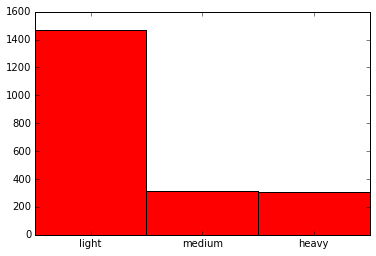

Testing labels:


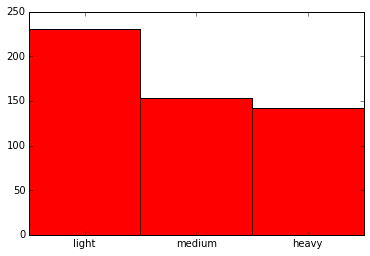

In [85]:
print "Training labels:"
traffic_hist(y_train)
print "Testing labels:"
traffic_hist(y_test)

In [86]:
medium_hat = (y_test_hat == 1)
heavy_hat = (y_test_hat == 2)
light_hat = (y_test_hat == 0)

print sum(heavy_hat), sum(medium_hat), sum(light_hat)

print sum(y_test == 2), sum(y_test == 1), sum(y_test == 0) 

146 139 240
142 153 230


In [87]:
y_test_hat[light_hat] = 0
y_test_hat[medium_hat] = 1
y_test_hat[heavy_hat] = 2

In [88]:
print sum(y_test_hat == 2), sum(y_test_hat == 1), sum(y_test_hat == 0) 

print sum(y_test == 2), sum(y_test == 1), sum(y_test == 0) 

146 139 240
142 153 230


In [89]:
print "Clustering accurency: %f" % (sum(y_test_hat == y_test) / float(len(y_test)))

Clustering accurency: 0.480000


In [64]:
from sklearn.metrics import confusion_matrix

print confusion_matrix(y_test, y_test_hat)

[[167  41  22]
 [ 52  31  70]
 [ 21  67  54]]


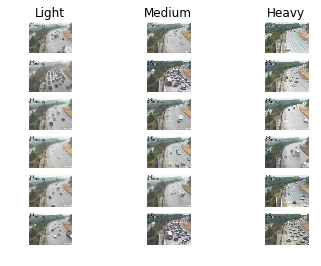

In [93]:
display_subsample(6, X_train_original, y_test_hat)